<a href="https://colab.research.google.com/github/akashmavle5/tutorial/blob/master/credit-card-fraud30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd
dataset = pd.read_csv('drive/MyDrive/creditcard.csv')
dataset.head()

/content


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:


dataset.shape



(284807, 31)

In [ ]:


dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:


dataset.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Fraud vs Non-fraud cases Count')

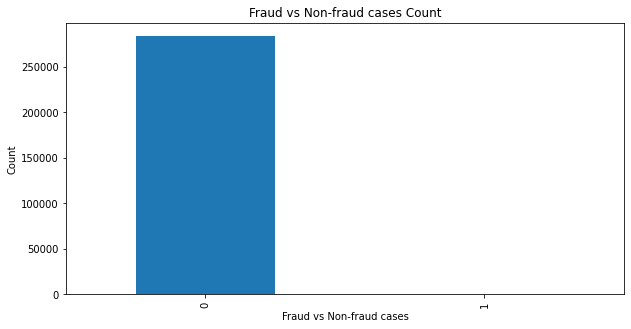

In [ ]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = dataset.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

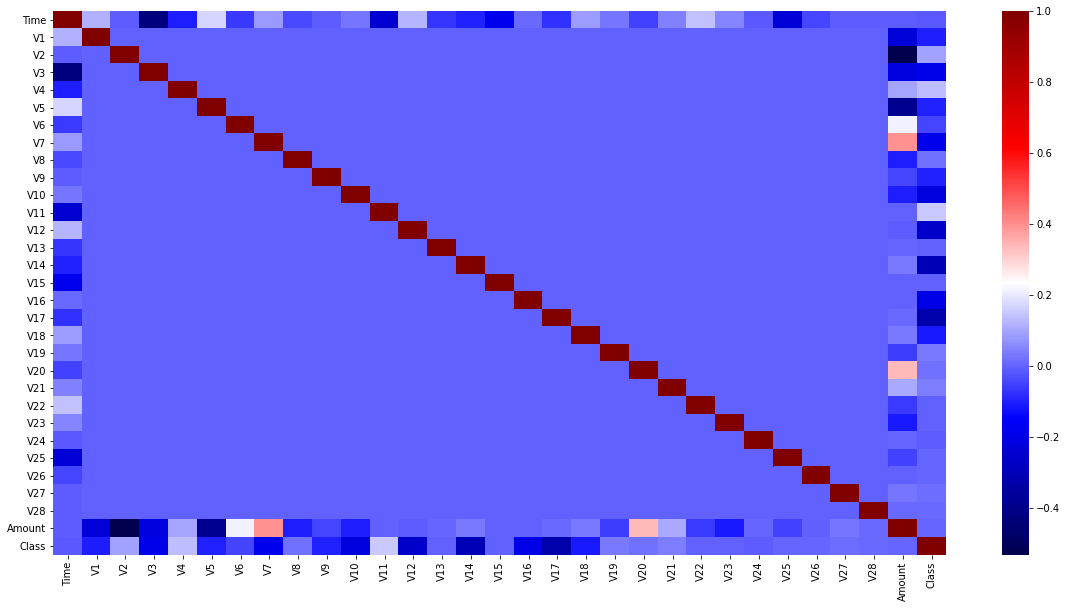

In [ ]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show()

In [ ]:
X = dataset.drop(["Class"], axis = 1)
y = dataset["Class"]

In [ ]:


tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)



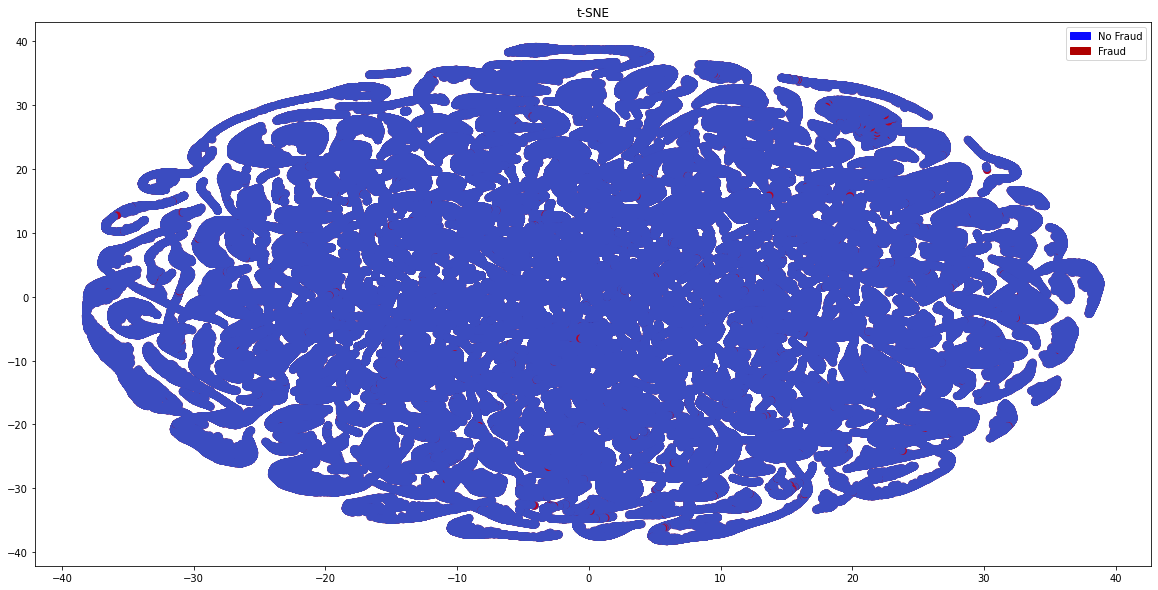

In [ ]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
X_trainA = X_train.drop(["Time"], axis = 1)
X_testA = X_test.drop(["Time"], axis = 1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_trainA)
X_test = sc.transform(X_testA)

In [25]:
print(y_train[y_train.values == 0].shape[0])
print(y_train[y_train.values == 1].shape[0])
print(y_test[y_test.values == 0].shape[0])
print(y_test[y_test.values == 1].shape[0])

199019
345
85296
147


In [26]:
def fit_and_predict(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_testA)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("Accuracy Score:", accuracy_score(y_test, ypred))
    print("Recall Score:", recall_score(y_test, ypred))
    print("Precision Score:", precision_score(y_test, ypred))
    
    test_df = pd.DataFrame(X_test, columns = X.columns[1:])
    test_df['Actual'] = y_test.values
    test_df['Predicted'] = ypred
    test_df.head()
    tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
    actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
    print("True Positives: ", tp)
    print("Accuracy for fraud cases: ", (tp / actual_positive))
    print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
    return roc_curve(y_test, ypred)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainA, y_train)
print("Threshold:", lr_threshold)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[85284    12]
 [   55    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.63      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992158515033414
Recall Score: 0.6258503401360545
Precision Score: 0.8846153846153846
True Positives:  92
Accuracy for fraud cases:  0.6258503401360545
ROC AUC Score:  0.8128548267928443
Threshold: [2 1 0]


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainA, y_train)
print("Threshold:", dtree_threshold)

[[85263    33]
 [   35   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.76      0.77       147

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.999204147794436
Recall Score: 0.7619047619047619
Precision Score: 0.7724137931034483
True Positives:  112
Accuracy for fraud cases:  0.7619047619047619
ROC AUC Score:  0.880758936945628
Threshold: [2 1 0]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainA, y_train)
print("Threshold:", rf_threshold)

[[85289     7]
 [   34   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995201479348805
Recall Score: 0.7687074829931972
Precision Score: 0.9416666666666667
True Positives:  113
Accuracy for fraud cases:  0.7687074829931972
ROC AUC Score:  0.8843127079194085
Threshold: [2 1 0]


In [30]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainA, y_train)
print("Threshold:", adb_threshold)

[[85279    17]
 [   46   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.69      0.76       147

    accuracy                           1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992626663389628
Recall Score: 0.6870748299319728
Precision Score: 0.8559322033898306
True Positives:  101
Accuracy for fraud cases:  0.6870748299319728
ROC AUC Score:  0.8434377619928107
Threshold: [2 1 0]


In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainA, y_train)
print("Threshold:", xgb_threshold)

[[85287     9]
 [   35   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9994850368081645
Recall Score: 0.7619047619047619
Precision Score: 0.9256198347107438
True Positives:  112
Accuracy for fraud cases:  0.7619047619047619
ROC AUC Score:  0.8808996234959938
Threshold: [2 1 0]


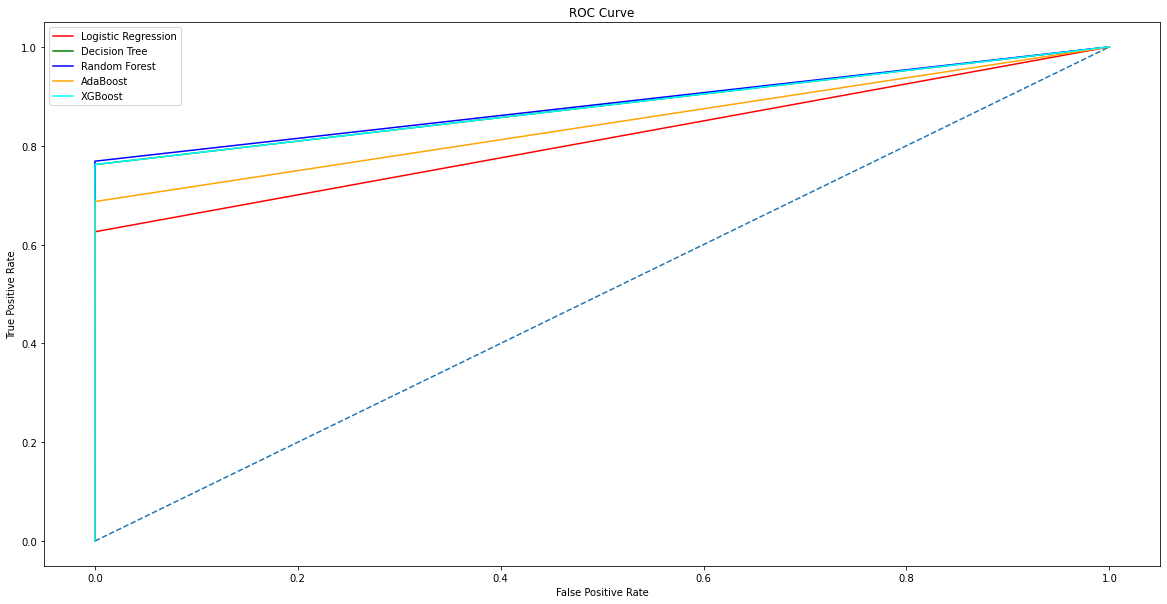

In [32]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [33]:
print(X_trainA.shape, y_train.shape)
print(X_testA.shape, y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [34]:
X_train1 = X_trainA
X_train1['Class'] = y_train
X_train1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95,0


In [35]:
X_train_0_class, X_train_1_class = X_train1.Class.value_counts()
print(X_train_0_class, X_train_1_class)

199019 345


In [36]:
X_train1_0_df = X_train1[X_train1['Class']==0]
X_train1_1_df = X_train1[X_train1['Class']==1]
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (345, 30)


In [37]:
# Balance Datasets
X_train1_1_df = X_train1_1_df.sample(X_train_0_class, replace=True, random_state=0)
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (199019, 30)


In [38]:
X_train1 = pd.concat([X_train1_0_df, X_train1_1_df])
X_train1.shape

(398038, 30)

In [39]:
print(X_train1[X_train1['Class']==0].shape)
print(X_train1[X_train1['Class']==1].shape)

(199019, 30)
(199019, 30)


In [40]:
X_trainB = X_train1.drop("Class", axis =1)
y_trainB = X_train1["Class"]

In [41]:
print(X_trainB.shape, y_trainB.shape)
print(X_testA.shape, y_test.shape)

(398038, 29) (398038,)
(85443, 29) (85443,)


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainB, y_trainB)
print("Threshold:", lr_threshold)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[83078  2218]
 [   13   134]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.91      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Accuracy Score: 0.9738890254321595
Recall Score: 0.9115646258503401
Precision Score: 0.05697278911564626
True Positives:  134
Accuracy for fraud cases:  0.9115646258503401
ROC AUC Score:  0.9427805308955322
Threshold: [2 1 0]


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainB, y_trainB)
print("Threshold:", dtree_threshold)

[[85271    25]
 [   45   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.69      0.74       147

    accuracy                           1.00     85443
   macro avg       0.90      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9991807403766253
Recall Score: 0.6938775510204082
Precision Score: 0.8031496062992126
True Positives:  102
Accuracy for fraud cases:  0.6938775510204082
ROC AUC Score:  0.8467922270202397
Threshold: [2 1 0]


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainB, y_trainB)
print("Threshold:", rf_threshold)

[[85290     6]
 [   35   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995201479348805
Recall Score: 0.7619047619047619
Precision Score: 0.9491525423728814
True Positives:  112
Accuracy for fraud cases:  0.7619047619047619
ROC AUC Score:  0.8809172093147896
Threshold: [2 1 0]


In [45]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainB, y_trainB)
print("Threshold:", adb_threshold)

[[84726   570]
 [   20   127]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.86      0.30       147

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443

Accuracy Score: 0.9930948117458422
Recall Score: 0.8639455782312925
Precision Score: 0.18220946915351507
True Positives:  127
Accuracy for fraud cases:  0.8639455782312925
ROC AUC Score:  0.9286314835444588
Threshold: [2 1 0]


In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainB, y_trainB)
print("Threshold:", xgb_threshold)

[[84950   346]
 [   19   128]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.27      0.87      0.41       147

    accuracy                           1.00     85443
   macro avg       0.63      0.93      0.71     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9957281462495465
Recall Score: 0.8707482993197279
Precision Score: 0.270042194092827
True Positives:  128
Accuracy for fraud cases:  0.8707482993197279
ROC AUC Score:  0.9333459185587573
Threshold: [2 1 0]


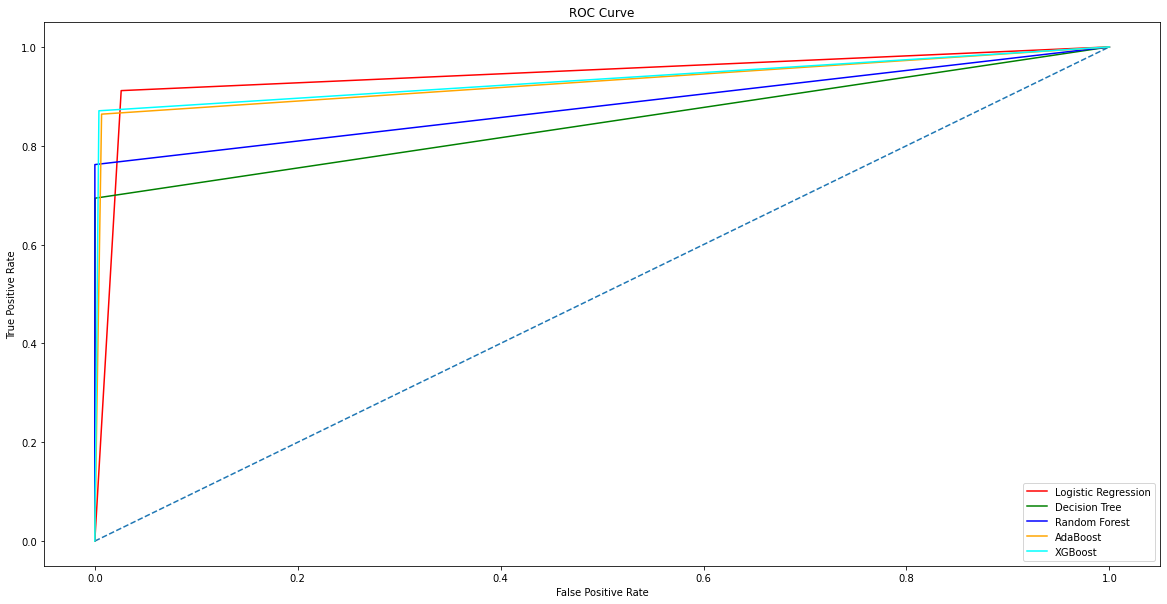

In [47]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [48]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [49]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="relu", input_dim=29))
classifier.add(Dense(units=2, activation="softmax"))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [50]:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
classifier.fit(X_trainB, y_trainB, batch_size=10, epochs=20)

Epoch 1/20
39804/39804 [==============================] - 46s 1ms/step - loss: 0.1164 - accuracy: 0.9605
Epoch 2/20
39804/39804 [==============================] - 46s 1ms/step - loss: 0.0348 - accuracy: 0.9912
Epoch 3/20
39804/39804 [==============================] - 46s 1ms/step - loss: 0.0232 - accuracy: 0.9943
Epoch 4/20
39804/39804 [==============================] - 45s 1ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 5/20
39804/39804 [==============================] - 45s 1ms/step - loss: 0.0160 - accuracy: 0.9957
Epoch 6/20
39804/39804 [==============================] - 45s 1ms/step - loss: 0.0144 - accuracy: 0.9964
Epoch 7/20
39804/39804 [==============================] - 45s 1ms/step - loss: 0.0132 - accuracy: 0.9965
Epoch 8/20
39804/39804 [==============================] - 45s 1ms/step - loss: 0.0121 - accuracy: 0.9970
Epoch 9/20
39804/39804 [==============================] - 44s 1ms/step - loss: 0.0106 - accuracy: 0.9976
Epoch 10/20
39804/39804 [==============================

In [52]:
ypred_nn = classifier.predict_classes(X_testA)
print(confusion_matrix(y_test, ypred_nn))
print(classification_report(y_test, ypred_nn))
print("Accuracy Score:", accuracy_score(y_test, ypred_nn))

test_df = pd.DataFrame(X_test, columns = X.columns[1:])
test_df['Actual'] = y_test.values
test_df['Predicted'] = ypred_nn
test_df.head()
tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
print("True Positives: ", tp)
print("Accuracy for fraud cases: ", (tp / actual_positive))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred_nn))
nn_fp, nn_tp, nn_threshold = roc_curve(y_test, ypred_nn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[85007   289]
 [   25   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.30      0.83      0.44       147

    accuracy                           1.00     85443
   macro avg       0.65      0.91      0.72     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9963250354037194
True Positives:  122
Accuracy for fraud cases:  0.8299319727891157
ROC AUC Score:  0.9132718858505698


In [53]:
classifier.evaluate(X_testA, y_test)

2671/2671 [==============================] - 3s 948us/step - loss: 0.0299 - accuracy: 0.9963


[0.029881879687309265, 0.9963250160217285]

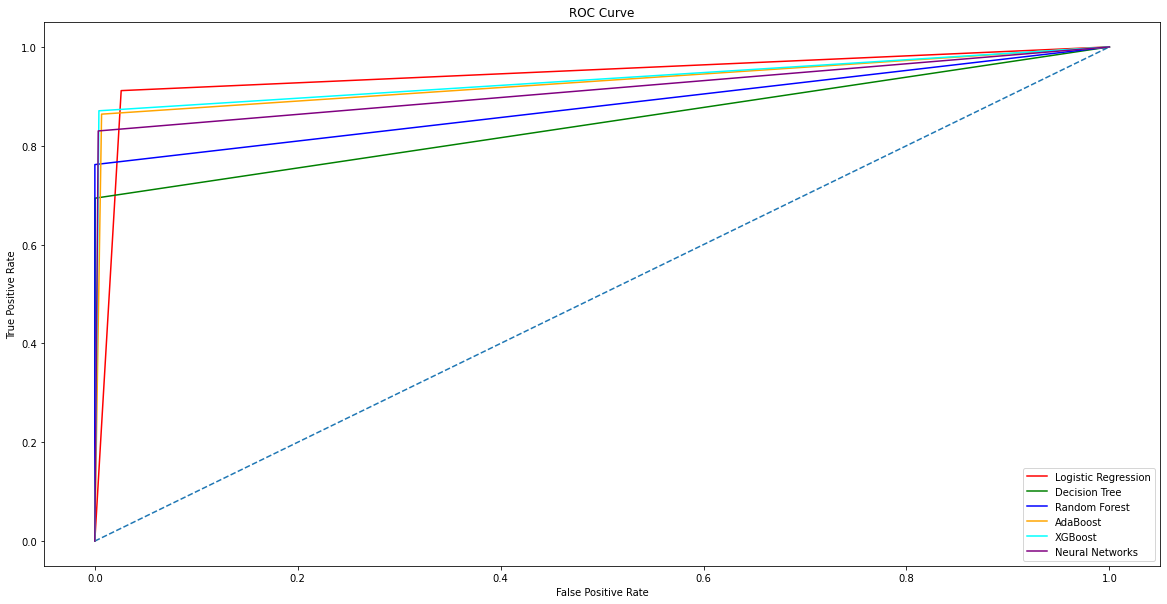

In [54]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.plot(nn_fp, nn_tp, color="purple", label = "Neural Networks")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [55]:
feature_importance_df = pd.DataFrame(X_trainB.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
13,V14,0.193510
11,V12,0.155095
10,V11,0.110429
9,V10,0.109288
3,V4,0.074846
2,V3,0.055983
16,V17,0.046411
15,V16,0.033350
1,V2,0.021526
6,V7,0.020526


Text(0.5, 1.0, 'Plot Feature Importances')

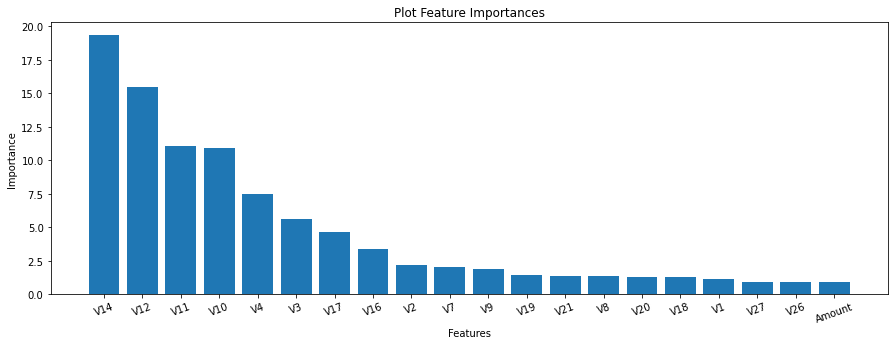

In [56]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")